# Convolutional Neural Networks for Image Classification 

------------

## Dataset

The built-in Fashion MNIST dataset will be used in this mini-project. This dataset includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

## The Data

### Download the dataset using Keras

In [1]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

## Visualizing the Data



In [25]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def display_image(img):
    fig = plt.figure(figsize = (5,5))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap = 'gray')

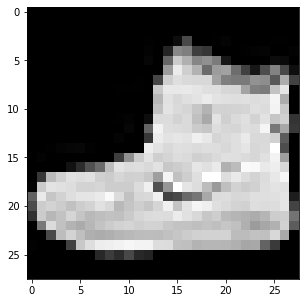

In [4]:
display_image(x_train[0])

In [5]:
y_train[0]

9

This is the image of class 9 ( an Ankle boot).

## Preprocessing the Data

### Normalize the X train and X test data 

In [6]:
x_train.max()

255

In [7]:
x_train = x_train/255

In [8]:
x_test = x_test/255

### Reshape the X arrays to include a 4 dimension of the single channel

In [9]:
x_train.shape

(60000, 28, 28)

In [10]:
x_test.shape

(10000, 28, 28)

In [38]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [12]:
x_train.shape

(60000, 28, 28, 1)

### Convert the y_train and y_test values to be one-hot encoded for categorical analysis 

In [13]:
from keras.utils.np_utils import to_categorical

In [14]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [15]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [16]:
y_train_cat

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Building the Model


In [17]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

In [18]:
model = Sequential()

## FIRST SET OF LAYERS
# CONVOLUTIONAL LAYER
model.add(Conv2D(filters =32, kernel_size = (4,4), input_shape = (28,28,1), activation = 'relu'))
# POOLING LAYER
model.add(MaxPooling2D(pool_size = (2,2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER 
model.add(Dense(128, activation = 'relu'))

# LAST LAYER IS THE CLASSIFIER
model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = 'accuracy')

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


### Training the Model


In [20]:
model.fit(x_train, y_train_cat, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.5466 - accuracy: 0.8043
Epoch 2/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2896 - accuracy: 0.8927
Epoch 3/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2357 - accuracy: 0.9130
Epoch 4/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1956 - accuracy: 0.9273
Epoch 5/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1719 - accuracy: 0.9359
Epoch 6/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1467 - accuracy: 0.9456
Epoch 7/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.1254 - accuracy: 0.9529
Epoch 8/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1064 - accuracy: 0.9608
Epoch 9/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0943 - accuracy: 0.9653
Epoch 10/10
1875/1875 [==============================] - 32s 17m

### Evaluating the Model


In [21]:
from sklearn.metrics import classification_report

In [41]:
predictions = np.argmax(model.predict(x_test), axis = -1)

In [42]:
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       977
           1       0.97      1.00      0.98       977
           2       0.88      0.85      0.86      1031
           3       0.93      0.91      0.92      1021
           4       0.89      0.84      0.86      1057
           5       0.98      0.98      0.98       999
           6       0.72      0.79      0.75       917
           7       0.97      0.96      0.97      1009
           8       0.99      0.97      0.98      1021
           9       0.97      0.97      0.97       991

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.92      0.91      0.92     10000



The model has 91% accuracy which is quite good.

Let's check the prediction of an image.

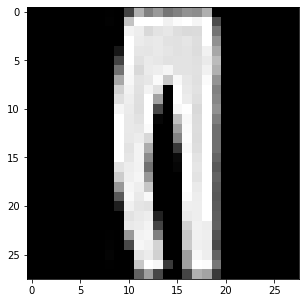

In [29]:
display_image(x_test[2])

In [30]:
# Actual class
y_test[2]

1

This test image is a pair of trouser (class 1)

In [48]:
# Reshape the test image to fit the input shape of the network
test_img = x_test[2].reshape(1,28,28,1)

In [49]:
predict = np.argmax(model.predict(test_img))
predict

1

And our model can correctly predict it as a pair of trouser (class 1)